# Iris Species Classification

#### Project description
This project is to predict the species of iris flowers based on the given features. Each flower's measurements serve as input features to a machine learning model, which learns to associate these features with the corresponding species of the flower.

#### Dataset

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species.

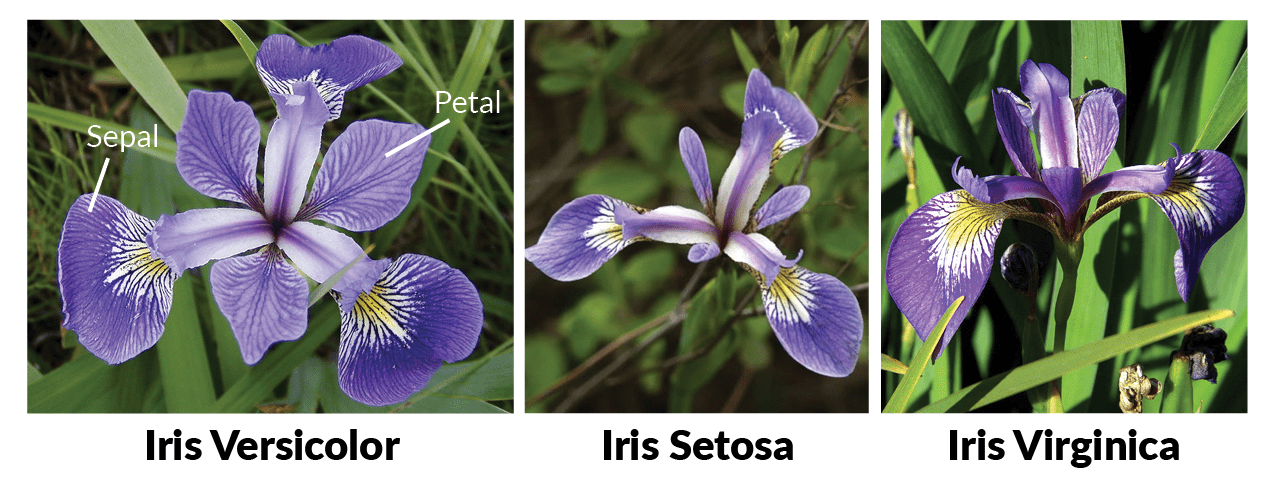

### Data Pre-processing

In [7]:
import numpy as pd
import pandas as pd
import pyspark
import os
import urllib
import sys
from pyspark.sql.functions import *
from pyspark.ml.classification import *
from pyspark.ml.evaluation import *
from pyspark.ml.feature import *

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
#Initialising SparkSession
spark=pyspark.sql.SparkSession.builder.appName('Iris').getOrCreate()

#Ignore warnings
warnings.filterwarnings("ignore")

In [12]:
#Check Python version & Spark version
print('Python version: {}'.format(sys.version))
print('Spark version: {}'.format(spark.version))

Python version: 3.9.12 (main, Feb 23 2023, 16:01:14) 
[Clang 14.0.0 (clang-1400.0.29.202)]
Spark version: 3.3.2


### 1. Load and Read the data

In [15]:
#Read CSV Dataset file
df=spark.createDataFrame(pd.read_csv('./dataset/iris.data', header=None, names=['sepal-length','sepal-width',
                                                                                'petal-length','petal-width','class']))
df.show()

+------------+-----------+------------+-----------+-----------+
|sepal-length|sepal-width|petal-length|petal-width|      class|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         4.8|        3.4|         1.6|        0.2|Iris-setosa|
|         4.8|        3.0|         1.4| 

In [17]:
#show the head of the dataset
df.head()

Row(sepal-length=5.1, sepal-width=3.5, petal-length=1.4, petal-width=0.2, class='Iris-setosa')

In [26]:
#Describe summary per column
df.describe()

DataFrame[summary: string, sepal-length: string, sepal-width: string, petal-length: string, petal-width: string, class: string]

In [27]:
#Show more info of the description
df.describe().show()

+-------+------------------+------------------+------------------+------------------+--------------+
|summary|      sepal-length|       sepal-width|      petal-length|       petal-width|         class|
+-------+------------------+------------------+------------------+------------------+--------------+
|  count|               150|               150|               150|               150|           150|
|   mean| 5.843333333333334|             3.054| 3.758666666666667|1.1986666666666668|          null|
| stddev|0.8280661279778632|0.4335943113621739|1.7644204199522624|0.7631607417008411|          null|
|    min|               4.3|               2.0|               1.0|               0.1|   Iris-setosa|
|    max|               7.9|               4.4|               6.9|               2.5|Iris-virginica|
+-------+------------------+------------------+------------------+------------------+--------------+



In [28]:
#Show the types of the dataset
df.dtypes

[('sepal-length', 'double'),
 ('sepal-width', 'double'),
 ('petal-length', 'double'),
 ('petal-width', 'double'),
 ('class', 'string')]

In [29]:
print('Rows: ', df.count())
print('Columns: ', len(df.columns))

Rows:  150
Columns:  5


In [31]:
# Display the count of entries for each unique class in the DataFrame.
df.groupBy("class").agg(count("*").alias("count")).show()

+---------------+-----+
|          class|count|
+---------------+-----+
|    Iris-setosa|   50|
|Iris-versicolor|   50|
| Iris-virginica|   50|
+---------------+-----+



### 2. Handle missing values

In [33]:
#check if any null value
null_count = df.dropna(how='any').count()

if null_count == df.count():
    print("Data does not contain any null values.")
else:
    print("Data contains null values.")
    
#check if any zero
zero_count = df.filter(col("sepal-length") == 0).count() + \
             df.filter(col("sepal-width") == 0).count() + \
             df.filter(col("petal-length") == 0).count() + \
             df.filter(col("petal-width") == 0).count()

if zero_count == 0:
    print("Data does not contain any zero values.")
else:
    print("Data contains zero values.")

Data does not contain any null values.
Data does not contain any zero values.


#### Skip Data cleaning process due to absence of null/zero values***

### 3. Data visualisation

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt

#Convert PySpark DataFrame to Pandas DataFrame
pdf = df.toPandas()

#### Scartter Plot

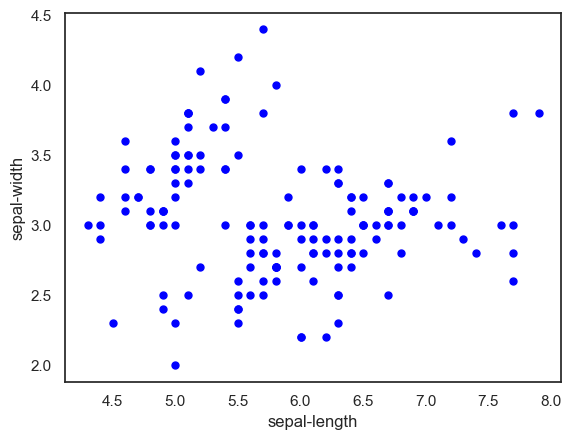

In [38]:
#Create scatter plot
pdf.plot(kind='scatter', x='sepal-length', y='sepal-width', 
         color="blue", s=25)

#Display plot
plt.show()

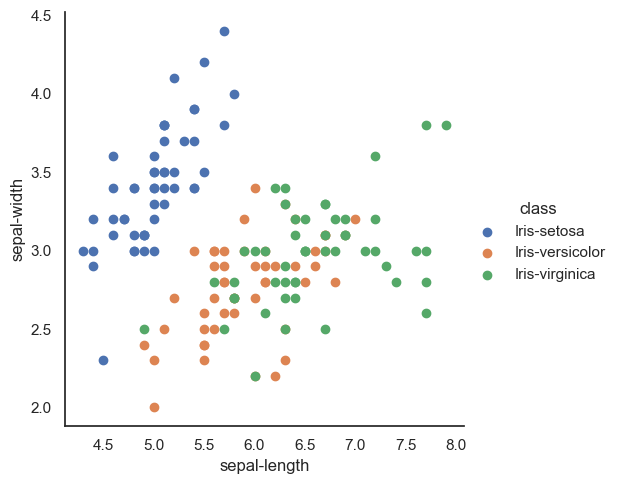

In [49]:
sns.FacetGrid(pdf, hue="class", height=5) \
   .map(plt.scatter, "sepal-length", "sepal-width") \
   .add_legend()

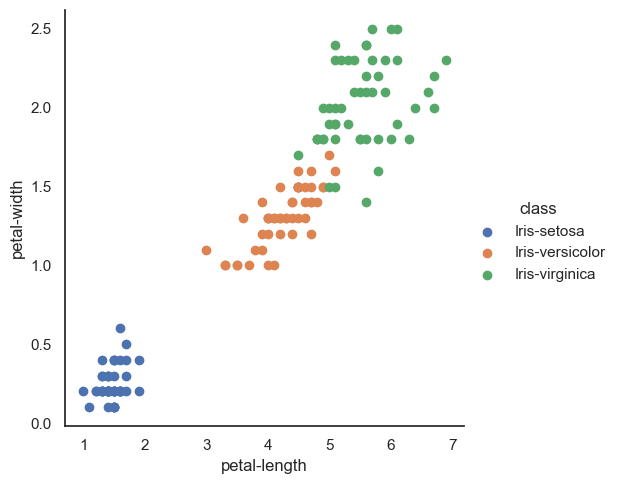

In [52]:
#Use seaborn to greate scartter plot by class
sns.FacetGrid(pdf, hue="class", height=5) \
   .map(plt.scatter, "petal-length", "petal-width") \
   .add_legend()

#### Box Plot

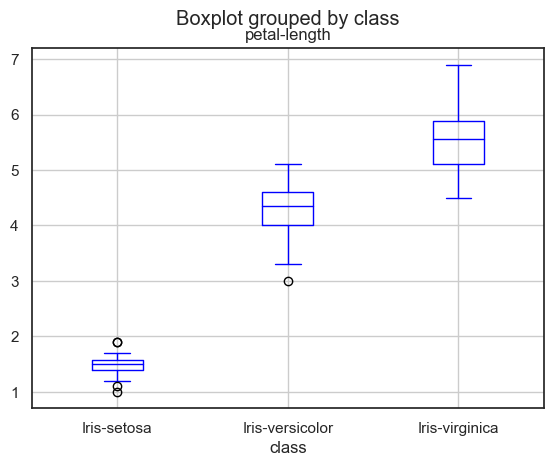

In [57]:
#create boxplot
pdf.boxplot(column='petal-length', by='class', color = 'blue')
plt.show()

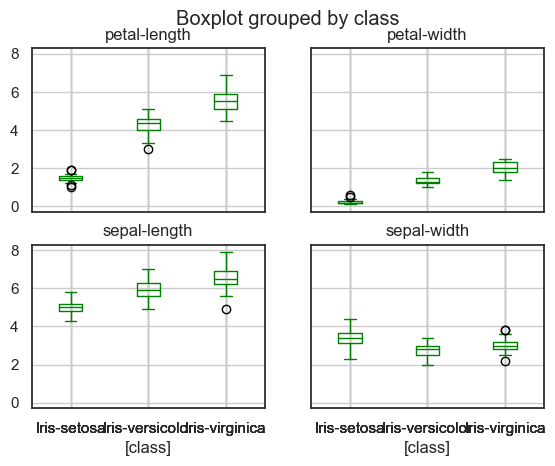

In [58]:
#create group by boxplot
pdf.boxplot(by='class', color = 'green')
plt.show()

The scatter plots display distinct characteristics for each Iris species based on sepal and petal measurements:

Iris-setosa:
- Sepal Characteristics: Smaller range of sepal lengths (4.5 to 5.5 cm) and widest sepal widths (3.5 to 4.5 cm).
- Petal Characteristics: Small petal lengths (1 to 2 cm) and widths (0.1 to 0.6 cm).

Iris-versicolor:
- Sepal Characteristics: Intermediate sepal lengths (5.0 to 7.0 cm) and narrower sepal widths (2.0 to 3.0 cm).
- Petal Characteristics: Medium petal lengths (3 to 5 cm) and widths (1.0 to 1.5 cm).

Iris-virginica:
- Sepal Characteristics: Longest sepal lengths (6.0 to 8.0 cm) and moderately wider sepal widths (2.5 to 3.5 cm).
- Petal Characteristics: Largest petal lengths (4.5 to 7.0 cm) and widths (1.5 to 2.5 cm).

#### Skip Data transformation***

### 4. Feature Engineering

Create new features from existing data by aggregating, transforming, and combining columns.

In [61]:
#create new list of column names of df excluding the last column
feature_col = df.columns[:-1]

#input in and output a new feature that group all input into one
assem = pyspark.ml.feature.VectorAssembler(inputCols=feature_col, outputCol='features')

#create a new df with the old df and the new feature
df1 = assem.transform(df)

df1.show()

+------------+-----------+------------+-----------+-----------+-----------------+
|sepal-length|sepal-width|petal-length|petal-width|      class|         features|
+------------+-----------+------------+-----------+-----------+-----------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|[5.0,3.4,1.5,0.2]|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|[4.4,2.9,1.4,0.2]|
|         4.9|  

In [62]:
# turn class into indexes
df1 = df1.select(['features', 'class'])
label_indexer = pyspark.ml.feature.StringIndexer(inputCol='class', outputCol='label').fit(df1)
df2 = label_indexer.transform(df1)

df2.show(10)
#where label is 1, 2 and 3 according to its class

+-----------------+-----------+-----+
|         features|      class|label|
+-----------------+-----------+-----+
|[5.1,3.5,1.4,0.2]|Iris-setosa|  0.0|
|[4.9,3.0,1.4,0.2]|Iris-setosa|  0.0|
|[4.7,3.2,1.3,0.2]|Iris-setosa|  0.0|
|[4.6,3.1,1.5,0.2]|Iris-setosa|  0.0|
|[5.0,3.6,1.4,0.2]|Iris-setosa|  0.0|
|[5.4,3.9,1.7,0.4]|Iris-setosa|  0.0|
|[4.6,3.4,1.4,0.3]|Iris-setosa|  0.0|
|[5.0,3.4,1.5,0.2]|Iris-setosa|  0.0|
|[4.4,2.9,1.4,0.2]|Iris-setosa|  0.0|
|[4.9,3.1,1.5,0.1]|Iris-setosa|  0.0|
+-----------------+-----------+-----+
only showing top 10 rows



In [63]:
#now all is numbered
df2 = df2.select(['features', 'label'])
df2.show(10)

+-----------------+-----+
|         features|label|
+-----------------+-----+
|[5.1,3.5,1.4,0.2]|  0.0|
|[4.9,3.0,1.4,0.2]|  0.0|
|[4.7,3.2,1.3,0.2]|  0.0|
|[4.6,3.1,1.5,0.2]|  0.0|
|[5.0,3.6,1.4,0.2]|  0.0|
|[5.4,3.9,1.7,0.4]|  0.0|
|[4.6,3.4,1.4,0.3]|  0.0|
|[5.0,3.4,1.5,0.2]|  0.0|
|[4.4,2.9,1.4,0.2]|  0.0|
|[4.9,3.1,1.5,0.1]|  0.0|
+-----------------+-----+
only showing top 10 rows



#### Skip Data normalisation***

### 5. Data split

Split the data into training and test sets to evaluate the performance of the model.

In [65]:
reg = 0.01

# load regularisation rate from argument if present
if len(sys.argv) > 1:
    try:
        reg = float(sys.argv[1])
    except ValueError:
        print("Error: Invalid regularization rate. Using default value of 0.01.")

Error: Invalid regularization rate. Using default value of 0.01.


In [67]:
#Split the dataset into 70% and 30%
train, test = df2.randomSplit([0.70, 0.30])

### 5.Categorical Encoding
Encode categorical variables into numerical format for processing by machine learning algorithms.

In [68]:
#use Logistic Regression to train on the training set
lr = pyspark.ml.classification.RandomForestClassifier(minInfoGain=reg)
model = lr.fit(train)

In [69]:
# predict on the test set
prediction = model.transform(test)
print("Prediction")
prediction.show(20)

Prediction
+-----------------+-----+--------------+---------------+----------+
|         features|label| rawPrediction|    probability|prediction|
+-----------------+-----+--------------+---------------+----------+
|[4.3,3.0,1.1,0.1]|  0.0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[4.6,3.1,1.5,0.2]|  0.0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[4.7,3.2,1.3,0.2]|  0.0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[5.0,3.4,1.5,0.2]|  0.0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[5.1,3.5,1.4,0.3]|  0.0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[5.4,3.7,1.5,0.2]|  0.0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[5.8,4.0,1.2,0.2]|  0.0|[19.0,1.0,0.0]|[0.95,0.05,0.0]|       0.0|
|[4.8,3.1,1.6,0.2]|  0.0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[4.9,3.1,1.5,0.1]|  0.0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[5.1,3.7,1.5,0.4]|  0.0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[5.1,3.8,1.5,0.3]|  0.0|[20.0,0.0,0.0]|  [1.0,0.0,0.0]|       0.0|
|[5.2,3.4,1.4,0.2]|  0.0|[20.0,0.0,0.

In [70]:
#evaluate the accuracy of the model using the test set
evaluator = pyspark.ml.evaluation.MulticlassClassificationEvaluator(metricName='accuracy')
accuracy = evaluator.evaluate(prediction)

print()
print('#####################################')
print('Regularization rate is {}'.format(reg))
print("Accuracy is {}".format(accuracy))
print('#####################################')


#####################################
Regularization rate is 0.01
Accuracy is 0.9818181818181818
#####################################


The Random Forest classifier achieved a high accuracy of 98.18% with a regularization rate of 0.01, indicating excellent predictive performance. This suggests that the model is effectively tuned and can reliably classify the dataset with minimal error.

Source:
1. Load the data into a PySpark DataFrame (https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)
2. Prepare the data for classification. This typically involves selecting the features and labels, and possibly scaling or transforming the data.
3. Split the data into training (70%) and test set (30%)
4. Train a classification model using the training data using Random Forest classifier (https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.ml.classification.RandomForestClassifier.html)
5. Predict the labels of the test data
6. Evaluate the model performance using any of the classification metrics like accuracy, f1 score, precision, recall etc. (https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.ml.evaluation.MulticlassClassificationEvaluator.html?highlight=multiclassclassificationevaluator#pyspark.ml.evaluation.MulticlassClassificationEvaluator)